In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [2]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Loading the Ultralytics YOLO model from Torchhub

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ankit singh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-7-5 Python-3.11.4 torch-2.0.1+cpu CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:03<00:00, 4.59MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [8]:
image = 'https://t1.gstatic.com/licensed-image?q=tbn:ANd9GcTYbK6PXno_zUJFQRr2SvCgvezzfQTcmUFE2CrmB2DAO7PDPm_qPp1gr0S7uzc545co'

In [9]:
res = model(image)

In [10]:
print(res)

image 1/1: 1365x2048 2 persons, 26 cars, 3 trucks
Speed: 771.4ms pre-process, 588.0ms inference, 27.0ms NMS per image at shape (1, 3, 448, 640)


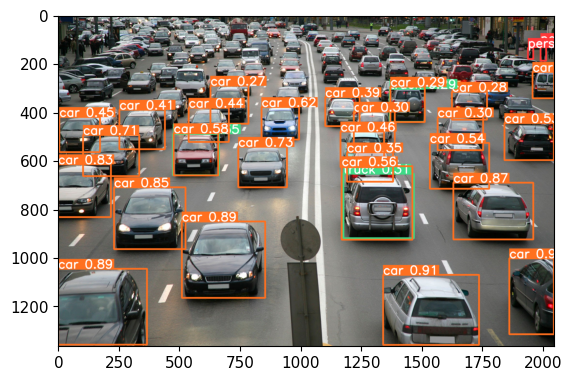

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(res.render()))
plt.show()

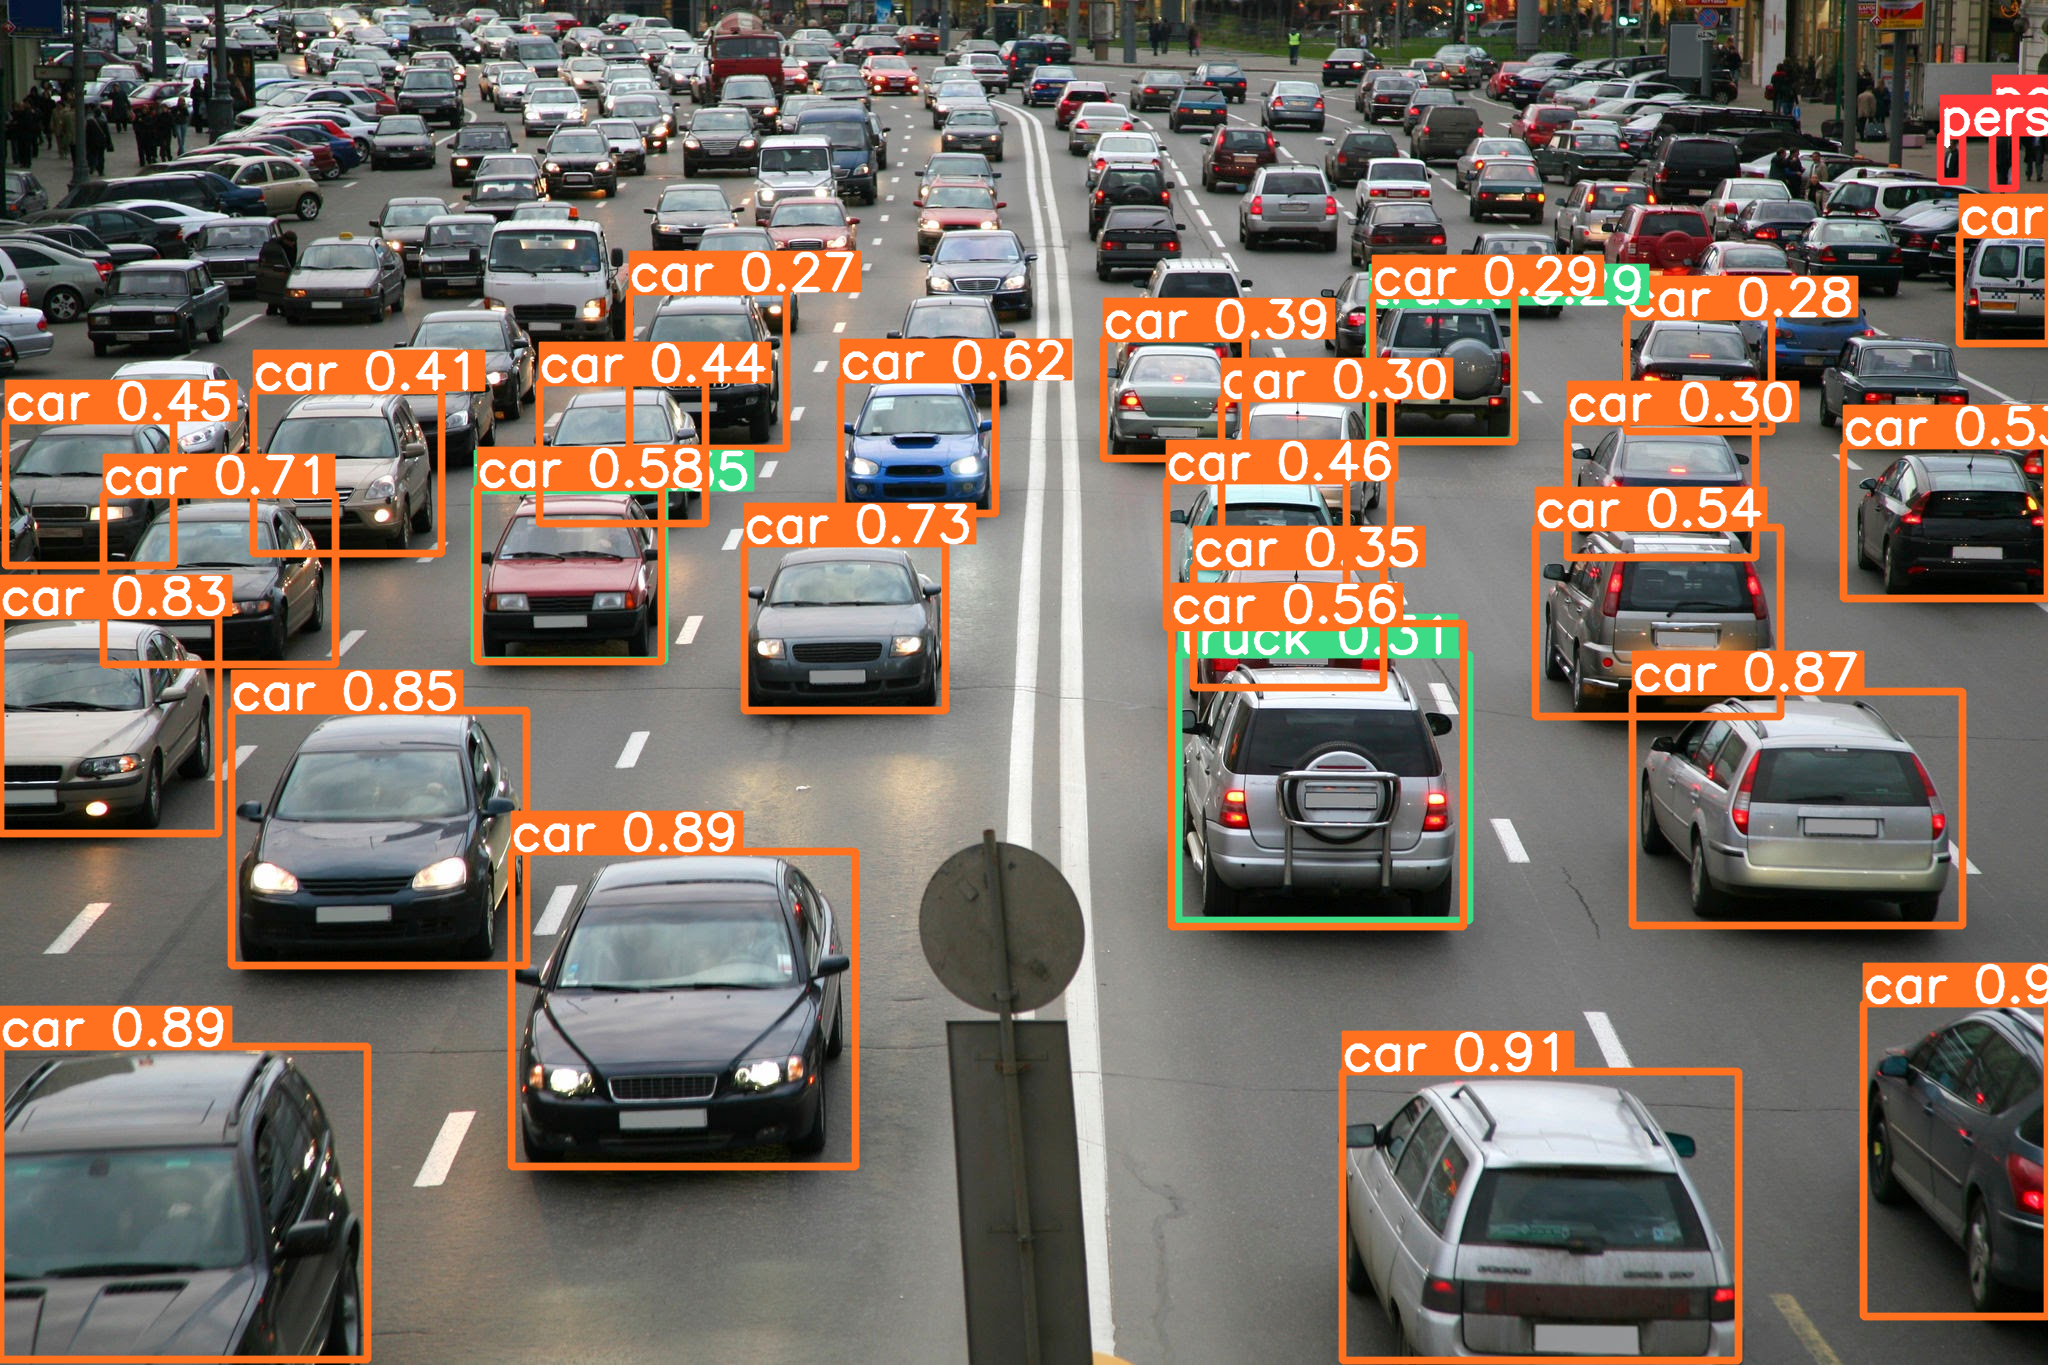

In [14]:
res.show()

### Real-time Detections

In [20]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    res = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(res.render()))
    
    if cv2.waitKey(10) & 0XFF == ord('x'):
        break

cap.release()
cv2.destroyAllWindows()

In [2]:
import uuid
import os
import time

In [3]:
img_path = os.path.join('data', 'images')
labels = ['drowsy', 'awake']
no_of_images = 10

In [5]:
vid = cv2.VideoCapture(0)

# looping through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # capturing 10 images for each label
    for img in range(no_of_images):
        print('Collecting images for {}, image number {}'.format(label, img))
        
        # capturing images through webcam
        ret, frame = vid.read()
        
        # naming each image captured through webcam
        img_name = os.path.join(img_path, label+'.'+str(uuid.uuid1())+'.jpg')
        #saving image
        cv2.imwrite(img_name, frame)
        
        # displaying image
        cv2.imshow('Image Collection', frame)
        
        # delaying time between capturing two consecutive images
        time.sleep(2)
    
    if cv2.waitKey(10) & 0XFF == ord('x'):
        break
        
vid.release()
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Labelling Images

In [6]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ankit singh\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~xml\\etree.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/31/58/e3b3dd6bb2ab7404f1f4992e2d0e6926ed40cef8ce1b3bbefd95877499e1/lxml-4.9.3-cp311-cp311-win_amd64.whl.metadata
Using cached lxml-4.9.3-cp311-cp311-win_amd64.whl (3.8 MB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.2
    Uninstalling lxml-4.9.2:
      Successfully uninstalled lxml-4.9.2


### Training the model

In [7]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

^C


### Loading our model

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

<IPython.core.display.Javascript object>

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ankit singh/.cache\torch\hub\master.zip
requirements: Ultralytics requirement ['ultralytics>=8.0.147'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  9.2s, installed 1 package: ['ultralytics>=8.0.147']
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2023-9-5 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [9]:
!pip show ultralytics

Name: ultralytics
Version: 8.0.124
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://github.com/ultralytics/ultralytics
Author: Ultralytics
Author-email: hello@ultralytics.com
License: AGPL-3.0
Location: C:\Users\ankit singh\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: matplotlib, opencv-python, pandas, Pillow, psutil, PyYAML, requests, scipy, seaborn, torch, torchvision, tqdm
Required-by: 


In [13]:
!pip install ultralytics==8.0.111

  Obtaining dependency information for ultralytics==8.0.111 from https://files.pythonhosted.org/packages/7a/b6/2fceaf46c712af4a65b5ad896a6acfe7dd498b9d591ba837aef7d69a95c7/ultralytics-8.0.111-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/592.5 kB ? eta -:--:--
   -- ------------------------------------ 30.7/592.5 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/592.5 kB 487.6 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/592.5 kB 487.6 kB/s eta 0:00:02
   ---- ---------------------------------- 61.4/592.5 kB 326.1 kB/s eta 0:00:02
   ------- ------------------------------ 112.6/592.5 kB 504.4 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/592.5 kB 423.5 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/592.5 kB 458.0 kB/s eta 0:00:01
   -------------- ----------------------- 225.3/592.5 kB 597.3 kB/s eta 0:00:01
   ----------------- -------------------- 276.5/592.5 kB 680.9 kB/s eta

In [14]:
!pip show ultralytics 

Name: ultralytics
Version: 8.0.111
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://github.com/ultralytics/ultralytics
Author: Ultralytics
Author-email: hello@ultralytics.com
License: AGPL-3.0
Location: C:\Users\ankit singh\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: matplotlib, opencv-python, pandas, Pillow, psutil, PyYAML, requests, scipy, seaborn, torch, torchvision, tqdm
Required-by: 


In [16]:
pip install --upgrade ultralytics

In [24]:
test_img1 = os.path.join('data','images', 'awake.2e20c728-4bbf-11ee-a10b-f80daccb6043.jpg')

In [25]:
res = model(test_img1)

In [26]:
print(res)

image 1/1: 480x640 1 awake
Speed: 15.0ms pre-process, 659.0ms inference, 22.0ms NMS per image at shape (1, 3, 480, 640)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

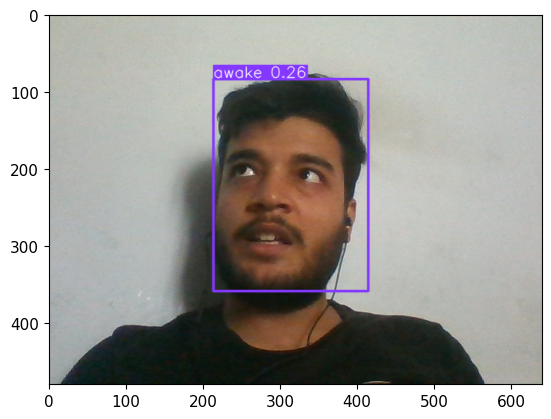

In [27]:
%matplotlib inline
plt.imshow(np.squeeze(res.render()))

In [29]:
# accessing system's webcam using OpenCV
vid = cv2.VideoCapture(0)

while vid.isOpened():
    
    # capturing the video frame using frame
    ret, frame = vid.read()
    
    # passing the frame to the YOLO model
    results = model(frame)
    
    # display the frame
    cv2.imshow('Feeling Drowsy?', np.squeeze(results.render()))
    
    # the webcam close upon presing 'c' button
    if cv2.waitKey(10) & 0xFF == ord('c'):
        break
    
vid.release()
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>